# Nibabel Library

https://nipy.org/nibabel/

```conda install -c conda-forge nibabel```

In [3]:
from numpy import concatenate, zeros, linspace

from matplotlib.pyplot import subplots

from matplotlib.image import imread


## Load images and get data

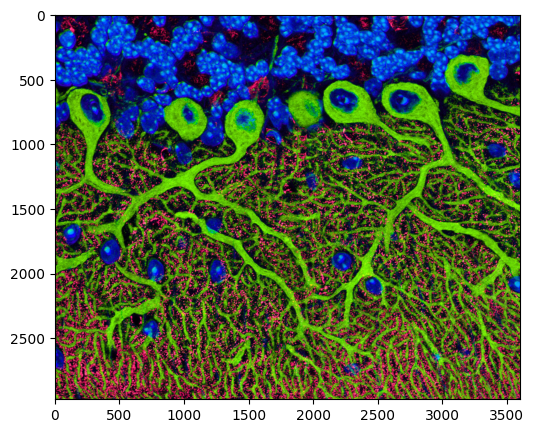

In [6]:
img = imread('rat_cerebellum.jpg')

fig, ax = subplots(figsize=(6, 5))

ax.imshow(img, cmap='gray');


In [8]:
downsample = 3

img_r = img[::downsample, ::downsample, 0].reshape(-1, 1)
img_g = img[::downsample, ::downsample, 1].reshape(-1, 1)
img_b = img[::downsample, ::downsample, 2].reshape(-1, 1)

img_reshaped = concatenate((img_r, img_g, img_b), axis = 1)

img_reshaped.shape

(1191392, 3)

In [10]:
img[:10, :10, 0]

array([[17, 17, 18, 19, 19, 20, 21, 20, 20, 17],
       [16, 15, 16, 17, 18, 18, 19, 19, 17, 16],
       [14, 13, 14, 14, 15, 16, 15, 15, 15, 14],
       [ 9, 10, 10, 11, 12, 12, 12, 12, 12, 11],
       [ 8,  8,  8,  9,  9,  8,  8,  8,  8,  8],
       [ 5,  5,  5,  6,  6,  6,  6,  6,  6,  7],
       [ 5,  5,  5,  5,  5,  5,  5,  6,  6,  5],
       [ 3,  3,  3,  3,  3,  5,  5,  5,  5,  4],
       [ 0,  0,  0,  0,  0,  0,  1,  3,  4,  4],
       [ 1,  1,  1,  0,  0,  0,  1,  3,  3,  4]], dtype=uint8)

## Visualise and Concatenate

Seaborn: https://seaborn.pydata.org

c.f. pair grid example
https://seaborn.pydata.org/examples/pair_grid_with_kde.html

kdeplot documentation
https://seaborn.pydata.org/generated/seaborn.kdeplot.html




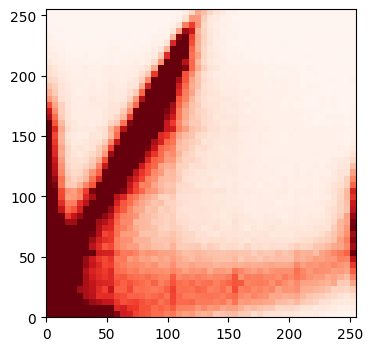

In [13]:
fig, ax = subplots(figsize=(4, 4))

# 2D Histogram
ax.hist2d(img_reshaped[:, 0], img_reshaped[:, 1], bins=50, vmax=1000, cmap='Reds');


# GMM clustering


In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
n_components = 4

SEED = 12345

gmm = GaussianMixture(n_components=n_components, random_state=SEED)

all_img_labels = gmm.fit_predict(img_reshaped)

all_img_labels[0]


np.int64(2)

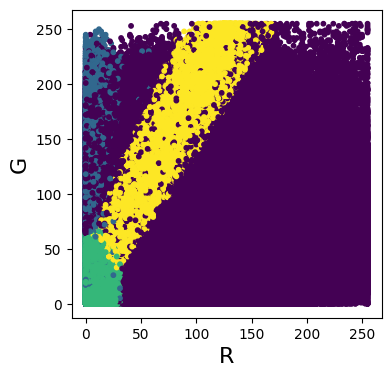

In [28]:
fig, ax = subplots(figsize=(4, 4))

ax.scatter(img_reshaped[:, 0], img_reshaped[:, 1], c=all_img_labels, s=10)

ax.set_xlabel('R', fontsize=16)
ax.set_ylabel('G', fontsize=16);


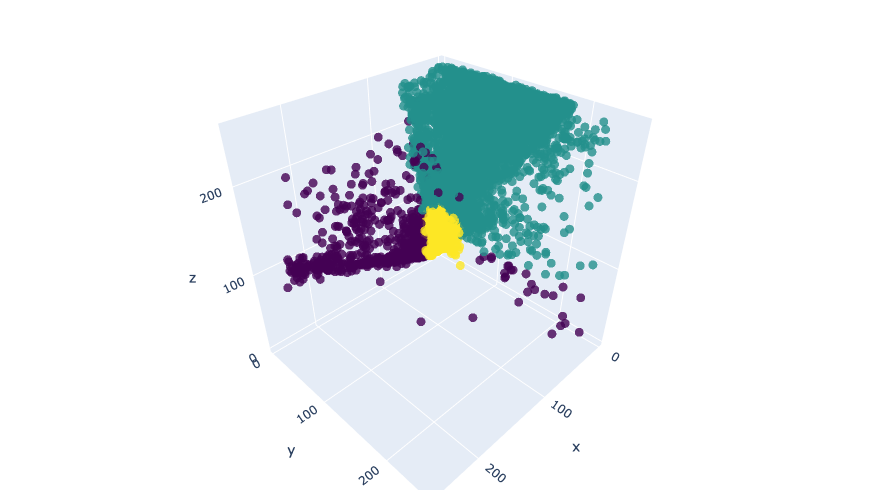

In [77]:
import plotly.graph_objects as go

col_1 = [int(number) for number in img_reshaped[:1000, 0]]

fig = go.Figure(data=[go.Scatter3d(x=(img_reshaped[:10000, 0]),
                                   y=(img_reshaped[:10000, 1]),
                                   z=(img_reshaped[:10000, 2]),
                    mode='markers',
                    marker=dict(
                        color=(all_img_labels[:10000]),
                        size=5,
                        # colorscale='matter',   # choose a colorscale
                        colorscale='viridis',   # choose a colorscale
                        opacity=0.8),
                                  )])

fig.update_layout(
    scene = dict(
                     xaxis = dict(nticks=4, range=[-5, 260],),
                     yaxis = dict(nticks=4, range=[-5, 260]),
                     zaxis = dict(nticks=4, range=[-5, 260]),),
    width=500,
    height=500,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

# fig.write_html("plotly_graph.html")


In [41]:
img_reshaped.shape

(1191392, 3)

In [79]:
all_img_labels_mapped = zeros(img[::downsample, ::downsample, 0].shape)

mask = all_img_labels_mapped>-1

all_img_labels_mapped[mask] = all_img_labels


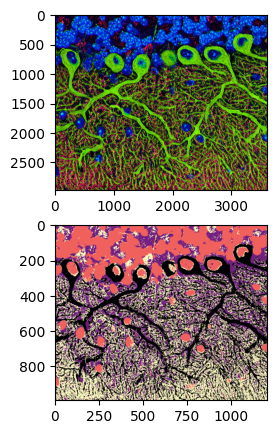

In [81]:
fig, ax = subplots(nrows=2, figsize=(5, 5))

ax[0].imshow(img, cmap='gray');
ax[1].imshow(all_img_labels_mapped, cmap='magma_r');
